# Statistical Treatment For Retail Datasets

## Project Overview
Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

- Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
- Is there a difference in unit sold based on building category?
- What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?


## Projects Rubric
### Code Review

Criteria	Meet Expectations
- Measure of Central Tendency: Mean	Student Mengimplementasikan Mean dari - - Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy
- Measure of Central Tendency: Median	Student Mengimplementasikan Median dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy
- Measure of Central Tendency: Modus	Student Mengimplementasikan Modus dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy
- Measure of Spread: Range	Student Mengimplementasikan Range dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy
- Measure of Spread: Variance
Student Mengimplementasikan Variance dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy
- Measure of Spread: Standard Deviation
Student Mengimplementasikan SD dari Kolom/Data Spesifik Menggunakan Pandas, Numpy, Atau Scipy
- Probability Distribution	Student Menganalisa Distribusi Data Dan Menarik Informasi Dari Distribusi Tersebut
- Confidence Intervals	Mengimplementasikan Confidence Intervals
- Hypothesis Testing	Membuat 1 Hipotesis Dan Menarik Kesimpulan Dari Data Yang Ada
- Preprocessing	Student Melakukan Preproses Dataset Sebelum Melakukan Proses Statistik.
- Apakah Kode Berjalan Tanpa Ada Error?	Kode Berjalan Tanpa Ada Eror. Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.

### Readability

Criteria	Meet Expectations
Tertata Dengan Baik	Semua Cell Di Notebook Terdokumentasi Dengan Baik Dengan Markdown Pada Tiap Cell Untuk Penjelasan Kode.

### Analysis

Criteria	Meet Expectations
Overall Analysis	Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.


## Running the Model

In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image


# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [3]:
df=pd.read_csv('nyc-rolling-sales.csv')
df.head(15)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

## Data Cleaning

In [5]:
# Display numbers in float format.
pd.options.display.float_format = '{:.2f}'.format

In [6]:
#delete 'Unnamed: 0' column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop(columns='EASE-MENT',axis=1, inplace=True)

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
#Replace the ' -  ' with value of 0 across the dataframe. 
df.replace({' -  ':0}, inplace = True)

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
#Replace BOROUGH code with the name.
df['BOROUGH'] = df['BOROUGH'].astype(str)

df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

df.head()



,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [9]:
#Change data type of the columns for better data manipulation.

df['SALE PRICE'] = df['SALE PRICE'].astype(float)
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype(int)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype(int)
df['SALE DATE']= pd.to_datetime(df['SALE DATE'])

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000.00,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,0.00,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,0.00,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272.00,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000.00,2016-11-17


In [10]:
#Create the column 'MONTH-YEAR' for further analysis
df['YEAR-MONTH'] = pd.to_datetime(df['SALE DATE']).dt.to_period('M')

#Create column 'PRICE/GROSS SQUARE FEET' for further analysis. 
df['PRICE/GROSS SQUARE FEET'] = df['SALE PRICE']/df['GROSS SQUARE FEET']

#For all propreties that has 'SALE PRICE' or 'GROSS SQUARE FEET' equal with 0 we will replace the result in 'PRICE/GROSS SQUARE FEET' with the value 0.
df.replace(np.nan,0, inplace = True)
df.replace(np.inf,0, inplace = True)


#Change data type of the columns for better memory utilization.
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['YEAR-MONTH'] = df['YEAR-MONTH'].astype('category')

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR-MONTH,PRICE/GROSS SQUARE FEET
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,5,1633,6440,1900,2,C2,6625000.00,2017-07-19,2017-07,1028.73
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,31,4616,18690,1900,2,C7,0.00,2016-12-14,2016-12,0.00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,17,2212,7803,1900,2,C7,0.00,2016-12-09,2016-12,0.00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,10,2272,6794,1913,2,C4,3936272.00,2016-09-23,2016-09,579.37
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,6,2369,4615,1900,2,C2,8000000.00,2016-11-17,2016-11,1733.48


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [12]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,PRICE/GROSS SQUARE FEET
count,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00
mean,4237.22,376.22,10731.99,2.03,0.19,2.25,2717.79,2724.45,1789.32,1056622.99,142.34
std,3568.26,658.14,1290.88,16.72,8.71,18.97,34909.50,28810.80,537.34,10387939.93,433.52
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1322.75,22.00,10305.00,0.00,0.00,1.00,0.00,0.00,1920.00,0.00,0.00
50%,3311.00,50.00,11209.00,1.00,0.00,1.00,1770.00,1076.00,1940.00,415000.00,0.00
75%,6281.00,1001.00,11357.00,2.00,0.00,2.00,2658.00,2080.00,1965.00,830000.00,247.61
max,16322.00,9106.00,11694.00,1844.00,2261.00,2261.00,4252327.00,3750565.00,2017.00,2210000000.00,75974.85


In [13]:
df['BOROUGH'].describe()

# Queens memiliki block terbanyak

count      84548
unique         5
top       Queens
freq       26736
Name: BOROUGH, dtype: object

In [14]:
df.value_counts(['BOROUGH'])

BOROUGH      
Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
dtype: int64

## Measure of Central Tendency
Measures of central tendency menunjukkan nilai tengah atau pusat dari kumpulan data.

### Mean
Mean atau Average adalah central tendency dari data, angka diantara seluruh data tersebar.



Question : berapa rata-rata harga jual setiap BOROUGH
- Hitung mean dengan numpy
- mean_SPBR = mean sale price per borough

In [15]:
# Write your function below
mean_SPBR = df.groupby(['BOROUGH']) \
.agg(mean_SPBR = pd.NamedAgg('SALE PRICE', np.mean)) \
    .reset_index()
# Graded-Function Begin (~1 Lines)
mean_SPBR.sort_values(by="mean_SPBR")
# Graded-Function End

,BOROUGH,mean_SPBR
4,Staten Island,388443.62
3,Queens,510347.65
0,Bronx,590193.64
1,Brooklyn,834488.37
2,Manhattan,2632835.05


Result:

The mean of sale price per each borough using numpy are shown as per above table.
The highest mean of sale price goes to Manhattan and the bottom is Staten Island

### Median
Median adalah nilai yang membagi data dalam 2 bagian yang sama yaitu jumlah suku di sisi kanannya sama dengan jumlah suku di sisi kirinya saat data disusun dalam urutan naik atau turun. Median adalah nilai "tengah" atau titik tengah dalam data kita dan juga disebut "persentil ke-50".



Question : Mencari median untuk harga jual setiap BOROUGH
- Hitung median dengan numpy ('np.median)
- median_SPBR = median sales price per borough

In [16]:
# Write your function below
median_SPBR = df.groupby(['BOROUGH']) \
    .agg(median_SPBR = pd.NamedAgg('SALE PRICE', np.median)) \
    .reset_index()
# Graded-Function Begin (~1 Lines)
median_SPBR.sort_values(by="median_SPBR")
# Graded-Function End

,BOROUGH,median_SPBR
0,Bronx,270000.00
3,Queens,305000.00
4,Staten Island,355000.00
1,Brooklyn,420000.00
2,Manhattan,835500.00


Result :
- Median tertinggi Manhattan
- Median Bronx merupakan harga jual terendah di wilayah NYC

### Modus
Mode adalah nilai yang muncul secara maksimum dalam kumpulan data, nilai yang memiliki frekuensi tertinggi. Modus adalah nilai atau kategori yang paling sering muncul dalam data. Oleh karena itu, set data tidak memiliki mode, jika tidak ada nomor yang diulangi atau jika tidak ada kategori yang sama.

Question : Mencari angka yang sering muncul (mode) dari tahun dibangunnya unit (YEAR BUILD) tersebut
- Menghitung mode menggunakan statistic
- Mode_YBB = mode for year build per borough

In [17]:
# Write your function below
Mode_YBB = df.groupby(['BOROUGH']) \
    .agg(Mode_YBB = pd.NamedAgg('YEAR BUILT', statistics.mode)) \
    .reset_index()
# Graded-Function Begin (~1 Lines)
Mode_YBB.sort_values(by="Mode_YBB")
# Graded-Function End

,BOROUGH,Mode_YBB
0,Bronx,0
1,Brooklyn,0
2,Manhattan,0
3,Queens,1920
4,Staten Island,1970


Result:
Tahun pembangunan yang paling sering muncul dalam data:
- Queens pada tahun 1920
- Staten Island = 1970

## Measure of Spread
Measure of Spread mengacu pada gagasan variabilitas dalam data kita. Measure of Spread juga digunakan untuk mengukur seberapa "bagus" mean merepresentasikan kumpulan data (How far away data from the center).




### Range
Range /Rentang adalah salah satu teknik statistik deskriptif yang paling sederhana. Range adalah perbedaan antara nilai terendah dan tertinggi.

Question : mencari range pada harga jual (SALE PRICE) pada masing-masing BOROUGH
- menghitung range dengan numpy (np.ptp)

In [18]:
# Write your function below
# Exclude null sale price
df = df.loc[df["SALE PRICE"].notnull(), :]
# Graded-Function Begin (~1 Lines)
df.head()
# Graded-Function End

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR-MONTH,PRICE/GROSS SQUARE FEET
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,5,1633,6440,1900,2,C2,6625000.00,2017-07-19,2017-07,1028.73
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,31,4616,18690,1900,2,C7,0.00,2016-12-14,2016-12,0.00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,17,2212,7803,1900,2,C7,0.00,2016-12-09,2016-12,0.00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,10,2272,6794,1913,2,C4,3936272.00,2016-09-23,2016-09,579.37
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,6,2369,4615,1900,2,C2,8000000.00,2016-11-17,2016-11,1733.48


In [19]:
# Write your function below
df2 = df.loc[df["SALE PRICE"]!=0, :]
# Graded-Function Begin (~1 Lines)
df2.head()
# Graded-Function End

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR-MONTH,PRICE/GROSS SQUARE FEET
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,5,1633,6440,1900,2,C2,6625000.00,2017-07-19,2017-07,1028.73
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,10,2272,6794,1913,2,C4,3936272.00,2016-09-23,2016-09,579.37
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,6,2369,4615,1900,2,C2,8000000.00,2016-11-17,2016-11,1733.48
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,8,1750,4226,1920,2,C4,3192840.00,2016-09-23,2016-09,755.52
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,24,4489,18523,1920,2,D9,16232000.00,2016-11-07,2016-11,876.32


In [20]:
# Write your function below
df_BR = df2.groupby(["BOROUGH"]) \
      .agg(df_BR = pd.NamedAgg("SALE PRICE", np.ptp)) \
      .reset_index()
# Graded-Function Begin (~1 Lines)
df_BR.sort_values(by="df_BR")
# Graded-Function End

,BOROUGH,df_BR
0,Bronx,109999999.00
4,Staten Island,121999999.00
3,Queens,257499999.00
1,Brooklyn,344999999.00
2,Manhattan,2209999999.00


Result:
- Manhattan memliki harga jual tertinggi di bisnis properti NYC
- harga jual terendah adalah di Bronx

### Variance

Variance /Varians adalah kuadrat jarak rata-rata antara setiap kuantitas dan mean. Variance adalah kuadrat dari standar deviasi.

Question : Mencari nilai variance sales price per borough
- menghitung variance menggunakan numpy (np.var)

In [21]:
# Write your function below
var_BR = df2.groupby(["BOROUGH"]) \
      .agg(var_BR = pd.NamedAgg("SALE PRICE", np.var)) \
      .reset_index()
# Graded-Funtion Begin (~1 Lines)
var_BR.sort_values(by="var_BR")
# Graded-Funtion End

,BOROUGH,var_BR
4,Staten Island,3616714138861.78
0,Bronx,10373274255072.07
3,Queens,10458002854922.09
1,Brooklyn,23173456735881.59
2,Manhattan,580703100531455.62


Result
- Manhattan memiliki nilai variance harga jual tertinggi dibandingkan yang lain
- Bronx dan Queens memiliki nilai variance terhadap harga jual yang hampir mirip
- Nilai variance harga jual terendah adalah Staten Island

### Standard Deviation
Sample standard deviation adalah cara lain mengukur penyebaran data. Berhubungan dengan varians sampel, karena standard deviation, 𝑠, adalah positive square root dari sample variance.

Question:menghitung distribusi standard deviasi sale price per borough
- menghitung std dengan numpy (np.std)

In [22]:
# Write your function below
std_BR = df2.groupby(["BOROUGH"]) \
      .agg(std_BR = pd.NamedAgg("SALE PRICE", np.std)) \
      .reset_index()
# Graded-Funtion Begin (~1 Lines)
std_BR.sort_values(by="std_BR")
# Graded-Funtion End

,BOROUGH,std_BR
4,Staten Island,1901766.06
0,Bronx,3220756.78
3,Queens,3233883.56
1,Brooklyn,4813881.67
2,Manhattan,24097782.07


Result:
- Nilai standard deviasi harga jual terbesar adalah Manhattan dan disusul oleh Brooklyn
- Sementara nilai standard deviasi terendah adalah Staten Island

## Probability Distributions
Probability distribution adalah fungsi di bawah teori dan statistik probabilitas - yang memberi kita seberapa besar kemungkinan hasil yang berbeda dalam sebuah eksperimen. Probability distribution menggambarkan peristiwa dalam hal probabilitasnya; dari semua kemungkinan hasil. 

In [23]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
import scipy.stats as stats
import statsmodels.api as sm
import random
import warnings



Question : Membuat distribusi probabilitas atas harga jual properti pada masing-masing borough

In [24]:
# Write your function below
# Create dataset for specific range of sale price
dist_BR = df2[df2["SALE PRICE"] < 1E6]
# Graded-Function Begin
dist_BR.head()
# Graded-Function End

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR-MONTH,PRICE/GROSS SQUARE FEET
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,...,0,0,0,1920,2,C6,1.00,2016-09-06,2016-09,0.00
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,...,0,0,0,1920,2,C6,499000.00,2017-03-10,2017-03,0.00
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 3A",,10009,...,0,0,0,1920,2,C6,10.00,2017-04-28,2017-04,0.00
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",,10009,...,0,0,0,1920,2,C6,529500.00,2017-06-09,2017-06,0.00
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 2E",,10009,...,0,0,0,1920,2,C6,423000.00,2017-07-14,2017-07,0.00


In [25]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

C:\Users\3271117\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.015, 'Distribution of Properties Sale Price')

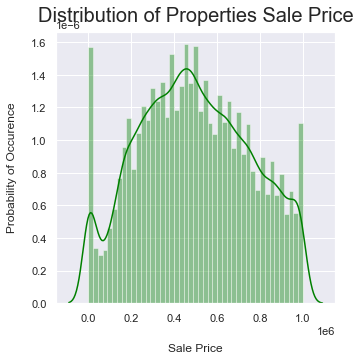

In [26]:
sns.distplot(dist_BR["SALE PRICE"],
            color="green")
plt.xlabel("Sale Price", labelpad=20)
plt.ylabel("Probability of Occurence", labelpad=14)
plt.title("Distribution of Properties Sale Price", y=1.015, fontsize=20)


Result:
- Nilai probabilitas distribusi untuk harga jual properti di NYC <1E6 dan terlihat memperoleh pola distribusi normal 

## Confidence Intervals
Dalam statistik, confidence interval (CI) adalah jenis estimasi yang dihitung dari data statistik yang diamati. Confidence interval mengukur seberapa akurat Mean sebuah sample mewakili (mencakup) nilai Mean Populasi sesungguhnya. Jadi secara singkat, Confidence Interval adalah rentang antara dua nilai di mana nilai suatu Sample Mean tepat berada di tengah-tengahnya.

Question : menganalisa nilai CI untuk data harga jual pada masing-masing BOROUGH 

In [27]:
# Write your function below
# View the mean and std for sale price in each borough
df2.groupby("BOROUGH").aggregate({"SALE PRICE": [np.mean, np.std, np.size]})
# Graded-Function Begin

# Graded-Function End

SALE PRICE                     
                    mean         std     size
BOROUGH                                      
Bronx          803452.10  3220756.78  5178.00
Brooklyn      1278963.79  4813881.67 15690.00
Manhattan     3337951.27 24097782.07 14439.00
Queens         739908.62  3233883.56 18441.00
Staten Island  543472.11  1901766.06  6011.00

In [28]:
# As the higest mean among the Boroughs, let's calculate CI for Borough 1
mean_Manhattan = 3337951.27
std_Manhattan= 24097782.07
n_Manhattan = 14439.00
z = 1.96

stderr_mean_Manhattan = std_Manhattan  / np.sqrt(n_Manhattan)
print("Standard error mean of sale price in Manhattan:", stderr_mean_Manhattan)

Standard error mean of sale price in Manhattan: 200543.46493435488


In [29]:
def compute_CI(estimate, stderr, z_score=1.96):
    return (
        estimate - z_score*stderr,
        estimate + z_score*stderr
    )

In [30]:
lower_ci, upper_ci = compute_CI(mean_Manhattan, stderr_mean_Manhattan)
print ('Result:')
print(f"CI for sale price in Manhattan: [{lower_ci:.3f}, {upper_ci:.3f}]",)

Result:
CI for sale price in Manhattan: [2944886.079, 3731016.461]


## Hyphotesis Testing

Hipotesis adalah anggapan dasar adalah jawaban sementara terhadap masalah yang masih bersifat praduga karena masih harus dibuktikan kebenarannya. 

Question = 
- Ho = Brooklyn = Queens
- H1 = Brooklyn ≠ Queens

In [31]:
#import statsnodel
import statsmodels.api as sm

In [32]:
df2.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,PRICE/GROSS SQUARE FEET
count,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00
mean,4151.62,390.77,10705.74,1.73,0.16,1.90,2437.37,2274.16,1810.11,1494927.31,201.38
std,3568.94,670.84,1264.10,14.16,9.82,17.34,36215.11,24054.22,505.75,12329530.52,504.00
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,1277.00,21.00,10301.00,0.00,0.00,0.00,0.00,0.00,1920.00,370000.00,0.00
50%,3167.00,50.00,11207.00,1.00,0.00,1.00,1056.00,0.00,1940.00,625500.00,0.00
75%,6107.00,1002.00,11356.00,2.00,0.00,2.00,2500.00,1848.00,1966.00,1070000.00,339.67
max,16319.00,9106.00,11694.00,1844.00,2261.00,2261.00,4252327.00,3750565.00,2017.00,2210000000.00,75974.85


1:'Manhattan',
2:'Bronx'
3:'Brooklyn'
4:'Queens'
5:'Staten Island'

In [33]:
# Write your function below
df_Brooklyn = df[df["BOROUGH"] == 'Brooklyn']
df_Queens = df[df["BOROUGH"] == 'Queens']

# num of observation
num_Brooklyn = len(df_Brooklyn)
num_Queens = len(df_Queens)

# mean
mu_Brooklyn = df_Brooklyn["SALE PRICE"].mean()
mu_Queens = df_Queens["SALE PRICE"].mean()

# std
std_Brooklyn = df_Brooklyn["SALE PRICE"].std()
std_Queens = df_Queens["SALE PRICE"].std()
# Graded-Function Begin

# Graded-Function End

In [34]:
sm.stats.ztest(df_Brooklyn["SALE PRICE"].dropna(), df_Queens["SALE PRICE"].dropna(), alternative="two-sided")

(10.900631590883725, 1.1445999494815779e-27)

Result:
- Ho = Brooklyn = Queens
- H1 = Brooklyn ≠ Queens

Conclusion of this hypothesis=
- Since  p-value <= $\alpha$ , means "reject the Null hypothesis". We are able to reject the hypothesis that the mean of sale price in Brooklyn and Queens is equal.

# Checklist Criteria
### Measure of Central Tendency
Mencari Mean, Median & Mode seluruh BOROUGH
1) Mean 
The highest mean of sale price goes to Manhattan (2632835.05) and the bottom is Staten Island (388443.62)

2) Median
Median tertinggi Manhattan (835500.00)

3) Modus
Data YEAR BUILT yang sering muncul pada Queens = 1920 dan Manhattan = 1970

### Measure of Spread
Mencari Range, Variance & St.Deviasi seluruh BOROUGH
1) Range
Nilai Range tertinggi adalah Manhattan sebesar 2209999999.00

2) Variance
Nilai Variance tertinggi adalah Manhattan sebesar 580703100531455.62

3) STD
Nilai Stnadard Deviasi tertinggi adalah Manhattan sebesar 24097782.07

### Probability Distribution
Mencari bentuk distribusi untuk dataset yang dituju
Result : Normal Distribution
### CI
Mencari nilai standard error untuk Manhattan
Result :  [2944886.079, 3731016.461]
#### Hyphothesis Testing
Membuktikan hipotesa terhadap praduga bahwa nilai Z atas Brooklyn sama/tidak sama dengan Queens
Result = H1 = Brooklyn ≠ Queens